In [10]:
import torch

if torch.cuda.is_available():
    device = 0
    print("CUDA is available. Using GPU:", torch.cuda.get_device_name(device))
else:
    device = 'cpu' 
    print("CUDA is not available. Using CPU")

CUDA is available. Using GPU: NVIDIA GeForce RTX 3060 Laptop GPU


In [14]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.145  Python-3.7.0 torch-1.12.1+cu113 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
Setup complete  (8 CPUs, 15.7 GB RAM, 67.9/230.5 GB disk)


In [17]:
from ultralytics import YOLO

model = YOLO('yolov8n-seg.pt')

In [18]:
import shutil

model.train(data='./data.yaml', epochs=50, patience=10, batch=32, imgsz=640, workers=0)

New https://pypi.org/project/ultralytics/8.3.27 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.145  Python-3.7.0 torch-1.12.1+cu113 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
WARNING  Upgrade to torch>=2.0.0 for deterministic training.
engine\trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=./data.yaml, epochs=50, patience=10, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=0, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=No


image 1/1 D:\Anaconda3_envs\gpu_3.7\datasets\test\images\img01899.png: 480x640 2 outsides, 4 fields, 3 lines, 1 ball, 1 player, 53.6ms
Speed: 4.1ms preprocess, 53.6ms inference, 8.6ms postprocess per image at shape (1, 3, 480, 640)


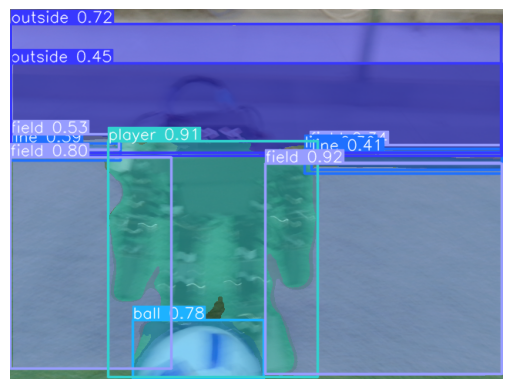

Ultralytics YOLOv8.0.145  Python-3.7.0 torch-1.12.1+cu113 CPU (11th Gen Intel Core(TM) i7-11370H 3.30GHz)

PyTorch: starting from 'runs\segment\train15\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) ((1, 41, 8400), (1, 32, 160, 160)) (6.5 MB)

ONNX: starting export with onnx 1.14.1 opset 15...
ONNX: export success  3.2s, saved as 'runs\segment\train15\weights\best.onnx' (12.6 MB)

Export complete (5.2s)
Results saved to D:\Anaconda3_envs\gpu_3.7\runs\segment\train15\weights
Predict:         yolo predict task=segment model=runs\segment\train15\weights\best.onnx imgsz=640 
Validate:        yolo val task=segment model=runs\segment\train15\weights\best.onnx imgsz=640 data=None 
Visualize:       https://netron.app
Loading runs\segment\train15\weights\best.onnx for ONNX Runtime inference...



ONNX Model Input Information:
Name: images, Shape: [1, 3, 640, 640], Data type: tensor(float)

ONNX Model Output Information:
Name: output0, Shape: [1, 41, 8400], Data type: tensor(float)
Name: output1, Shape: [1, 32, 160, 160], Data type: tensor(float)


image 1/1 D:\Anaconda3_envs\gpu_3.7\datasets\test\images\img01928.png: 640x640 2 outsides, 3 fields, 2 lines, 1 ball, 1 player, 102.5ms
Speed: 2.9ms preprocess, 102.5ms inference, 18.9ms postprocess per image at shape (1, 3, 640, 640)


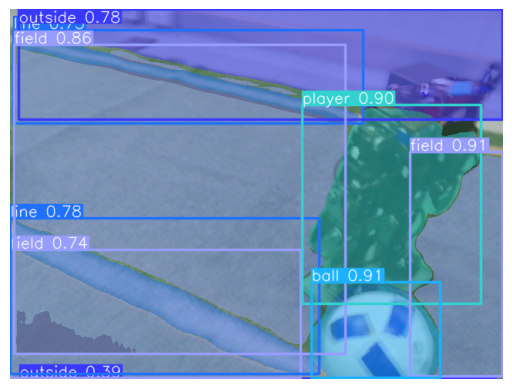

In [ ]:
from ultralytics import YOLO
import onnx
import onnxruntime as ort
import numpy as np
import cv2
import matplotlib.pyplot as plt

yolo_model = YOLO("./runs/segment/train15/weights/best.pt")
results = yolo_model("./datasets/test/images/img01899.png")

for result in results:
    result_image = result.plot()
    plt.imshow(result_image)
    plt.axis('off')
    plt.show()

yolo_model.export(format="onnx")

onnx_model_path = "./runs/segment/train15/weights/best.onnx"
onnx_yolo_model = YOLO(onnx_model_path)
onnx_model = onnx.load(onnx_model_path)

def inspect_onnx_model(model_path):
    session = ort.InferenceSession(model_path)

    print("ONNX Model Input Information:")
    for input in session.get_inputs():
        print(f"Name: {input.name}, Shape: {input.shape}, Data type: {input.type}")

    print("\nONNX Model Output Information:")
    for output in session.get_outputs():
        print(f"Name: {output.name}, Shape: {output.shape}, Data type: {output.type}")

inspect_onnx_model(onnx_model_path)

results = onnx_yolo_model("./datasets/test/images/img01928.png")

for result in results:
    result_image = result.plot()
    plt.imshow(result_image)
    plt.axis('off')
    plt.show()